# Pandas를 활용한 데이터 분석

1. Basic skills
2. Handling skills
> 3. Summary skills

## Summary skills 실습 목차
1. 기초 통계 및 요약
- 수치형 기술 통계
- 범주형 기술 통계
- 데이터 그룹화 (groupby)

2. 데이터 재구조화
- Pivot
- Melt

3. 시각화
- 히스토그램
- 파이 차트
- 막대 그래프
- 박스플롯
- 산점도

# 라이브러리

In [4]:
import pandas as pd

# 기초 통계 및 요약

**gapminder 데이터프레임을 살펴보아요.**

In [10]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder = pd.read_table('./gapminder.tsv')

**describe 메서드를 사용하여 gapminder 데이터프레임의 기초통계량을 살펴보아요**

In [11]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## 수치형 기술 통계

**1. mean 메서드를 사용하여 lifeExp 의 평균을 구해보아요.**

In [12]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['lifeExp'].mean()
#기대수명의 평균값

59.474439366197174

**2. min 메서드를 사용하여 lifeExp 의 최소값을 구해보아요.**

In [13]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['lifeExp'].min()

23.599

**3. max 메서드를 사용하여 lifeExp 의 최대값을 구해보아요.**

In [14]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['lifeExp'].max()

82.603

**3. std 메서드를 사용하여 lifeExp 의 표준편차를 구해보아요.**

In [15]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['lifeExp'].std()

12.917107415241192

In [17]:
gapminder.loc[gapminder['year']>1990, 'lifeExp'].mean()
#gapminder 데이터프레임에서 year 열이 1990년을 초과하는 행들을 선택하고, 그 중에서 lifeExp 열을 추출

65.46933978873241

## 범주형 기술 통계

**1. unique 메서드를 사용하여 continent 의 고유값을 구해보아요.**

In [20]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

**2. value_counts 메서드를 사용하여 continent 의 분포를 구해보아요.**

In [21]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['continent'].value_counts()
#각각 유니크한 값이 얼마나 있는지 카운트

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

**3. describe 메서드를 사용하여 continent 의 대표값을 구해보아요.**

In [23]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder['continent'].describe()
# 아프리카의 갯수가 624개로 가장 많다

count       1704
unique         5
top       Africa
freq         624
Name: continent, dtype: object

## 데이터 그룹화 (groupby)

**목적**: 데이터프레임을 특정 열을 기준으로 그룹화하여 그룹 단위로 연산을 수행합니다.  
**사용 사례**: 그룹화된 데이터에 대한 통계 또는 집계 연산을 수행할 때 사용됩니다. 예를 들어, 각 그룹에 대한 평균, 합계, 카운트 등을 계산할 수 있습니다.  

**집계함수 종류** : mean(), min(), max(), nunique(), value_counts(), count()
```python
DataFrame.groupby(by=None, axis=_NoDefault.no_default, sort=True, group_keys=True, dropna=True)
```
`dropna` 매개변수를 설정하여 그룹에 NA를 포함할지 여부를 선택할 수 있습니다. (기본 설정은 True 입니다.)

```python
데이터프레임.groupby('그룹화하고싶은열')['계산하고싶은열'].집계함수()
데이터프레임.groupby(['그룹화하고싶은열1','그룹화하고싶은열2'])[['계산하고싶은열1','계산하고싶은열1']].집계함수()
데이터프레임.groupby('그룹화하고싶은열').agg()
데이터프레임.groupby('그룹화하고싶은열').apply(lambda x: x)
```

### 그룹별 평균 구하기

In [24]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**1. year에 따른 lifeExp의 평균값을 구하세요.**

In [31]:
# 아래에 코드를 작성 후 실행해 보세요.
#그룹별(year)
gapminder.groupby(by='year')['lifeExp'].agg('mean')
# agg : aggregate 종합한다는 뜻.

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

**2. year과 continent에 따른 lifeExp와 gdpPercap의 평균값을 구하세요.**

In [33]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby(by=['year','continent'])[['lifeExp','gdpPercap']].agg('mean')

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

### 그룹별 개수 구하기

**1. countinent별 속한 country의 행의 개수를 구하세요**

In [35]:
# 아래에 코드를 작성 후 실행해 보세요.
# 문제가 조금 이상함.
gapminder.groupby(by='continent')['country'].agg('count')
# 각 대륙별로 카운팅 

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

**2. continent에서 country의 데이터 개수를 출력하세요**

In [ ]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby(by=['continent','country'])['country'].count()
#도시별로도 

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

**3. continent별로 고유한 country의 수를 구하시오**

In [44]:
# 아래에 코드를 작성 후 실행해 보세요.
temp_df = gapminder.groupby(by=['continent'])['country'].agg('unique')

In [45]:
[len(value) for value in temp_df]
#for문을 list 안에서 돌리기. (list 컴프리핸션)

[52, 25, 33, 30, 2]

### 그룹별 평균과 분산 구하기

**1. year별 lifeExp의 평균값과 분산값을 구하세요**

In [47]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby(by='year')['lifeExp'].agg(['mean','var'])

,mean,var
year,,
1952,49.057620,149.473995
1957,51.507401,149.604360
1962,53.609249,146.343337
1967,55.678290,137.331628
1972,57.647386,129.548857
1977,59.570157,126.050680
1982,61.533197,116.006208
1987,63.212613,111.435157
1992,64.160338,126.054051


# 데이터의 재구조화

## Pivot

**목적:** 데이터를 편하게 보기 위해 사용!   
**사용 사례:** 데이터의 column을 index, columns, values로 설정하여 데이터를 펼칠 수 있습니다.  

```python
data.pivot(index, columns, values)
pd.pivot_table(data, index, columns, values, aggfunc)
```

`index`: Index로 보낼 column (index를 설정하지 않으면 기존 index로 정해짐)  
`columns`: columns 값으로 보낼 column  
`values`: value 값으로 보낼 column

In [48]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**1. `pivot_table` 메서드를 사용하여 gapminder 데이터프레임에서 `index`는 'continent'와 'country'를 `columns`는 'year'를 `values`는 'liftExp'를 `aggfunc`는 'mean'으로 설정하여 피봇테이블을 생성해보세요.**

In [49]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.pivot_table(index='continent', columns='year', values='lifeExp', aggfunc='mean')
#대륙별로 연도별로 기대수명의 평균이 요약됨 
#오세아니아가 가장 오래산다는 것을 확인할 수 있음 
#아프리카가 가장 적게 산다는 것을 확인할 수 있음 

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


**2. `pivot_table` 메서드를 사용하여 gapminder 데이터프레임에서 `index`는 'year'를 `values`는 'lifeExp'를 `aggfunc`는 'mean'으로 설정하여 피봇테이블을 생성해보세요.**

In [50]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.pivot_table(index='year', values='lifeExp', aggfunc='mean')

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


## Melt
**목적**: DataFrame의 형태를 변경하여 'wide' 형식을 'long' 형식으로 변환합니다.  
**사용 사례**: 열 이름이 변수를 나타내고 열 값이 해당 변수의 관측치를 나타낼 때 사용됩니다. 주로 데이터 정리 및 시각화에 유용합니다.

```python
pd.melt(data, id_vars, var_name, value_name)
```
`data`: melt를 진행할 DataFrame 지정  
`id_vars`: 위치를 그대로 유지할 column의 이름을 지정 (None이면 id_vars를 뺀 나머지 column으로 자동 지정)  
`var_name`: unpivot할 column 이름 지정 (None이면 variable을 이름으로 함)  
`value_name`: value column 이름 지정 (None이면 value로 지정됨)

**pew 데이터프레임을 살펴보세요.**

In [51]:
pew = pd.read_csv('./pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


**1. 11개의 소득정보 열을 행으로 옮기려고 합니다. religion 열을 고정해서 melt 해보세요. 변수명은 income, 값명은 count로 설정해주세요.**

In [54]:
# 아래에 코드를 작성 후 실행해 보세요.
pew.melt(id_vars='religion', var_name='income', value_name='count')
#종교에 따른 월급
#가톨릭 사람중 10k달러 이하로 버는 사람이 418명이다.

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


# 시각화

## 히스토그램
* 숫자형 변수 1개를 시각화할 때 쓰임

**기대수명의 분포**

<Axes: ylabel='Frequency'>

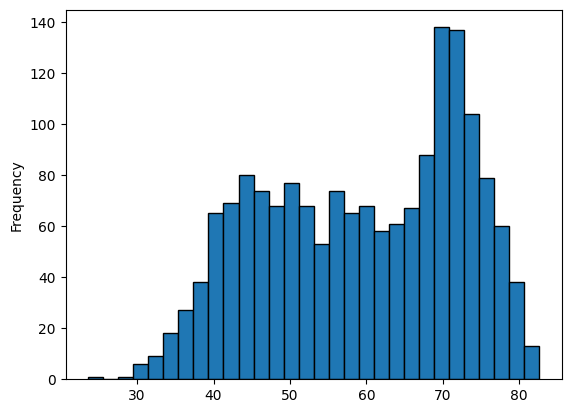

In [55]:
gapminder['lifeExp'].plot(kind='hist', bins=30, edgecolor='black')
#hist 히스토그램 : 수치형 그래프 그리기
#기대수명은 70쪽에 가장 많이 분포되어있네

## 파이 차트
* 범주형 변수 1개를 시각화할 때 쓰임

In [56]:
continent_counts = gapminder['continent'].value_counts()
continent_counts

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

<Axes: ylabel='count'>

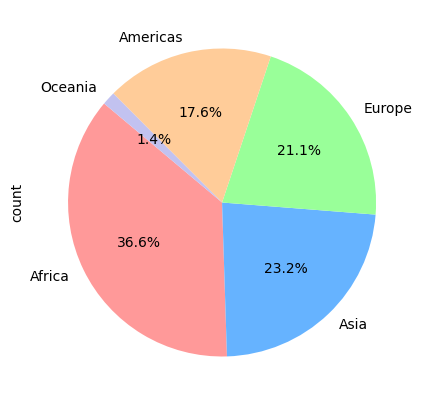

In [57]:
continent_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], figsize=(5, 5))
#autopct : 차지하는 값이 몇 퍼센트인지를 텍스트로 나타내줌
#startangle : 파이차트 돌리기 


## 막대 그래프
* 범주형 변수 1개와 숫자형 변수 1개를 시각화할 때 쓰임

**한국에서 년도별 인구수**

In [59]:
kor_df = gapminder[gapminder['country']=='Korea, Rep.']

<Axes: xlabel='year'>

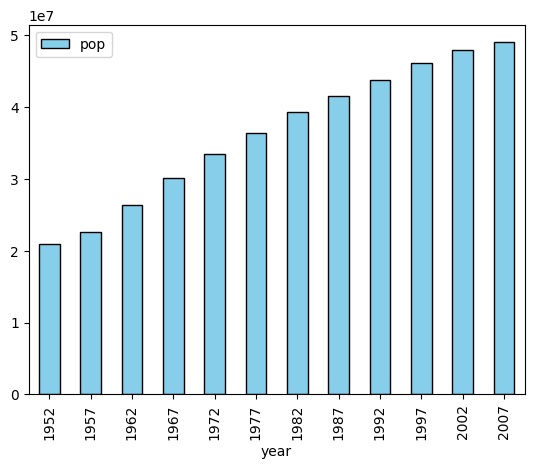

In [60]:
kor_df.plot(x='year', y='pop', kind='bar', color='skyblue', edgecolor='black')
#인구가 점점 증가한다 

## 박스플롯
* 범주형 변수 1개와 숫자형 변수 1개를 시각화할 때 쓰임

**대륙별 기대수명의 분포의 비교**

lifeExp    Axes(0.125,0.11;0.775x0.77)
dtype: object

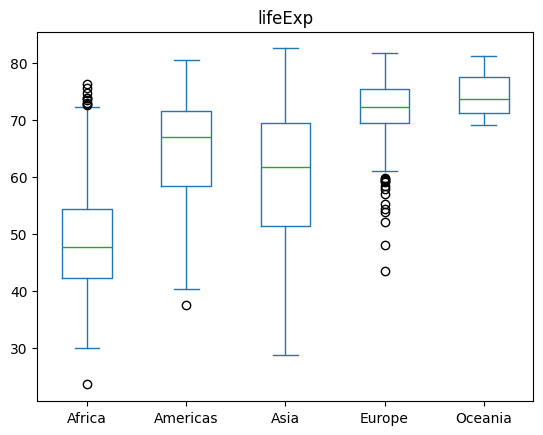

In [58]:
gapminder.plot(kind='box', column='lifeExp', by='continent')
#box plot은 by=가 없으면 column의 모든값을 다 데이터로 사용함. 
#보통 box plot은 범주 별로 그린다. 따라서 by=를 넣어야 함 
#아까 봤을 때 오세아니아가 평균기대수명이 높았는데, 
#실제로 박스플랏에서도 중간값이 다른 대륙보다 더 높게 나타남 

## 산점도
* 숫자형 변수가 2개를 시각화할 때 쓰임

**1인당 국민 소득과 기대수명의 관계**

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

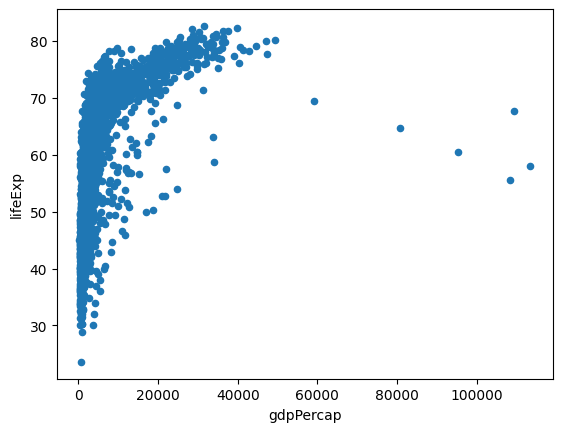

In [63]:
gapminder.plot(x='gdpPercap', y='lifeExp', kind='scatter')